<a href="https://colab.research.google.com/github/vpaula07/ESSI/blob/main/ESSI_SN_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Vanessa Paula

## MVP: Prática de Machine Learning em Python

Modelo: Usuários que viram anúncio em mídia social e se compraram ou não o produto. (0 = Não comprou e 1 = comprou)

https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [63]:
 pip install scikit-learn==1.0.2

In [64]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [65]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.dtypes.reset_index()

,index,0
0,User ID,int64
1,Gender,object
2,Age,int64
3,EstimatedSalary,int64
4,Purchased,int64


In [6]:
colunas = dataset.dtypes.reset_index()

In [7]:
colunas.columns

Index(['index', 0], dtype='object')

In [8]:
colunas[colunas[0] == 'object']['index']

1    Gender
Name: index, dtype: object

In [9]:
categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

In [10]:
categ_cols

['Gender']

In [11]:
# Fazendo o Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
for i in categ_cols:
    le.fit(dataset[i])
    dataset[str(i) + '_encoded'] = le.transform(dataset[i])

In [13]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [14]:
dataset = dataset.drop('Gender', axis = 1)

In [15]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [16]:
dataset.rename(columns={'Gender_encoded': 'Gender'}, inplace=True)

In [17]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [18]:
nova_ordem_colunas = ['User ID', 'Age', 'EstimatedSalary', 'Gender','Purchased']

In [19]:
dataset = dataset[nova_ordem_colunas]

In [20]:
dataset

,User ID,Age,EstimatedSalary,Gender,Purchased
0,15624510,19,19000,1,0
1,15810944,35,20000,1,0
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,1,0
...,...,...,...,...,...
395,15691863,46,41000,0,1
396,15706071,51,23000,1,1
397,15654296,50,20000,0,1
398,15755018,36,33000,1,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [29]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 42 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:4]
y = array[:,4]
#X = dataset.drop('Purchased', axis = 1)
#y = dataset['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.732143 (0.078653)
CART: 0.867857 (0.063987)
NB: 0.889286 (0.043595)
SVM: 0.642857 (0.000000)


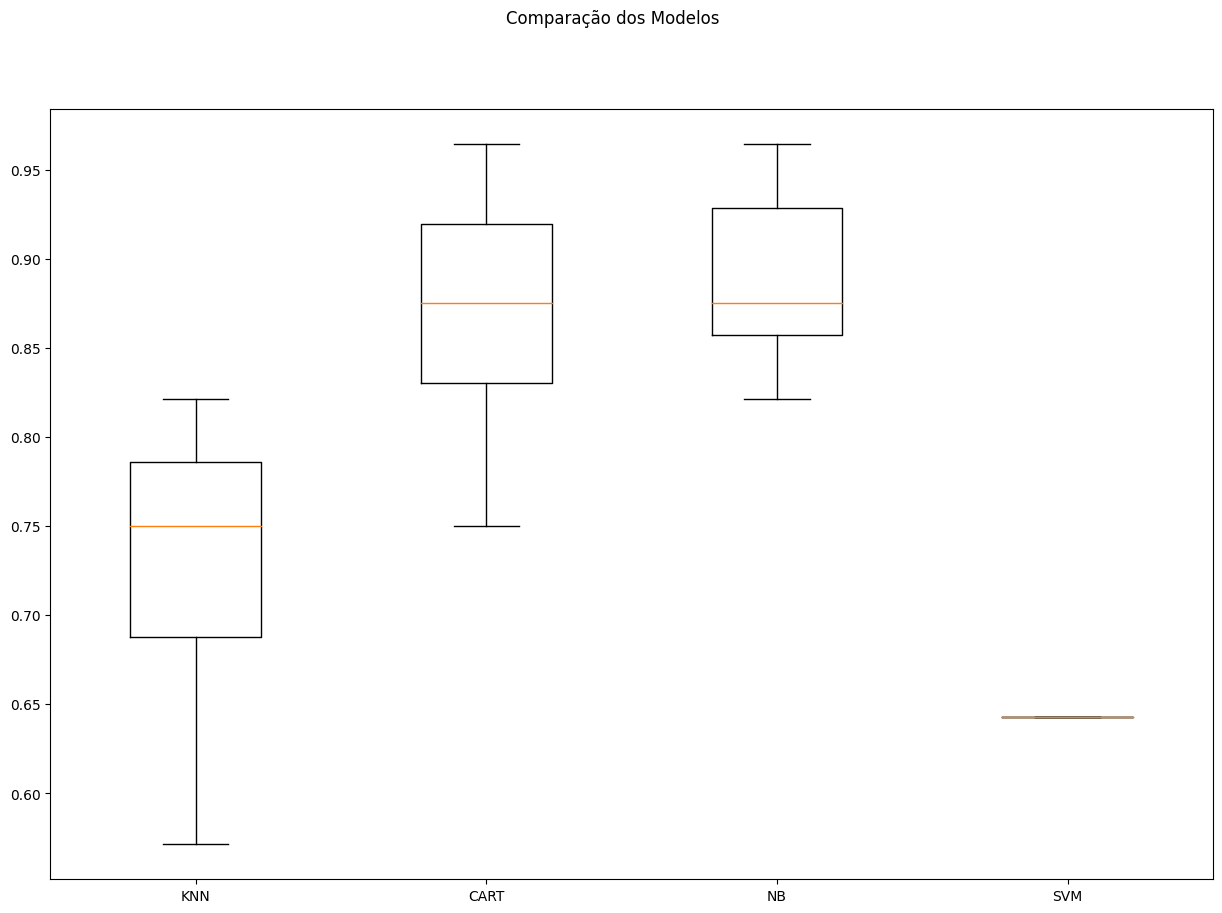

In [30]:
np.random.seed(42) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Treinando o Modelo - Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

modelo.fit(X_train,y_train)


GaussianNB()

Fazendo a predição

In [32]:
y_pred = modelo.predict(X_test)

In [33]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.8833333333333333


## Matriz de Confusão

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[72,  5],
       [ 9, 34]])

Matriz de Confusão - na vertical eu tenho a previsão do modelo e na horizontal tenho o resultado real.
 - 72 registros realmente acertei, a pessoa não comprou (real 0).
 - Errei 5 registros, ele errou que alguém não compraria(não mandaria anúncio para aquela pessoa).
 -Errei 9 vezes, onde disse que o usuário compraria e ele não comprou.
 -E 34 vezes eu acertei. Modelo foi perfeito onde o usuário não compraria e quando ele compraria, acertamos o dobro do que errou.
 Resumindo o modelo performou muito bem.

Text(50.722222222222214, 0.5, 'y_pred')

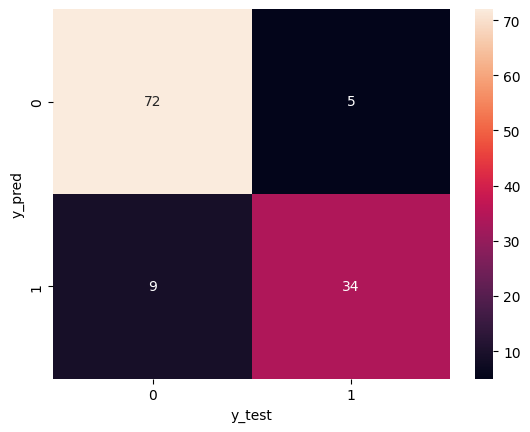

In [36]:
import seaborn as sns


sns.heatmap(confusion_matrix(y_test,y_pred), annot= True)

plt.xlabel('y_test')
plt.ylabel('y_pred')

- Precisão = modelos previu negativos. Acertou 87%.

- Recall = verificando os positivos. Acertei 79%.

- F1 = Intermediário entre a precisão e o recall. 82%.

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8717948717948718
0.7906976744186046
0.8292682926829267


### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.732 (0.079)
CART-orig: 0.868 (0.064)
NB-orig: 0.889 (0.044)
SVM-orig: 0.643 (0.000)
KNN-padr: 0.904 (0.042)
CART-padr: 0.871 (0.058)
NB-padr: 0.896 (0.041)
SVM-padr: 0.900 (0.035)
KNN-norm: 0.893 (0.039)
CART-norm: 0.868 (0.055)
NB-norm: 0.896 (0.041)
SVM-norm: 0.896 (0.046)


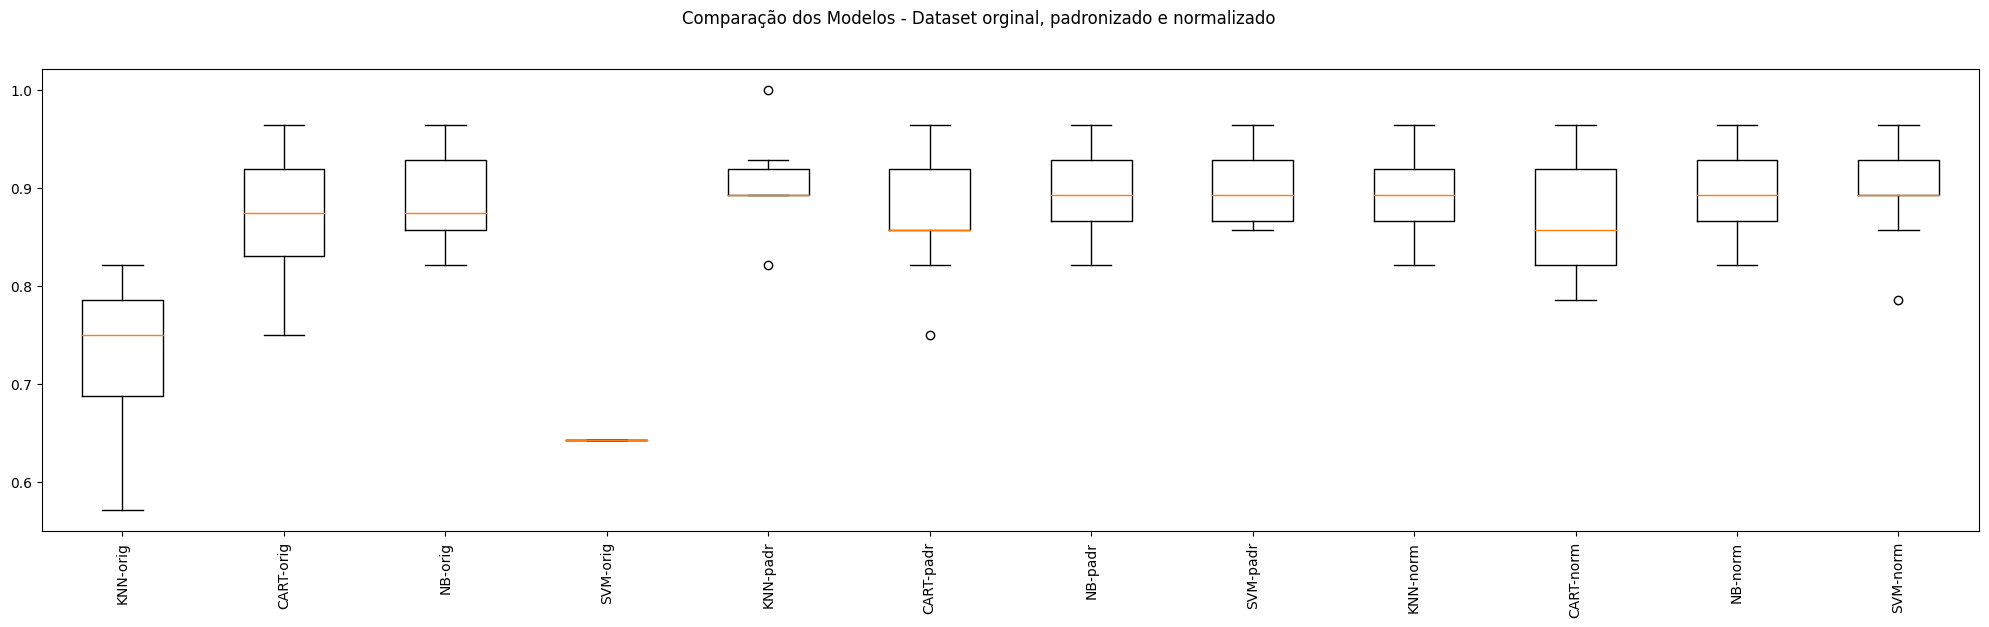

In [39]:
np.random.seed(42) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [40]:
# Tuning do KNN

np.random.seed(42) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: knn-orig - Melhor: 0.760714 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}
Modelo: knn-padr - Melhor: 0.903571 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: knn-norm - Melhor: 0.903571 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}


## Finalização do Modelo

In [41]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8916666666666667


In [43]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='euclidean')

## Simulando a aplicação do modelo em dados não vistos

In [58]:
 # Novos dados - não sabemos a classe!
data = {'User ID':  [202545630, 20252541, 45612312, 2525256],
        'Age': [39, 25, 51, 41],
        'EstimatedSalary': [36000,17000,54000, 25000],
        'Gender': [0,0,1,0],

        }

atributos = ['User ID','Age', 'EstimatedSalary','Gender']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 2.61083560e+03  1.28465159e-01 -9.90843673e-01 -9.80196059e-01]
 [ 6.37290004e+01 -1.20871865e+00 -1.54877595e+00 -9.80196059e-01]
 [ 4.18070683e+02  1.27462271e+00 -4.62276255e-01  1.02020406e+00]
 [-1.83967085e+02  3.19491418e-01 -1.31385710e+00 -9.80196059e-01]]


In [59]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 1 0]


In [60]:
import pickle

pickle_out = open("modelo_ads003.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [61]:
pickle_in = open("modelo_ads003.pkl", "rb")
modelo2 = pickle.load(pickle_in)
pickle_in.close()

saidas = modelo2.predict(rescaledEntradaX)
print(saidas)

[1 0 1 0]


In [62]:
import joblib

from joblib import dump, load
dump(model, 'modelo_ads003.joblib')

model = load('modelo_ads003.joblib')

## Conclusão

Na avaliação do Modelo - Tenho 88% de acurácia, modelo acertou 88%.

A taxa de acerto foi muito alta, para uma avaliação adicional, construir uma matriz de confusão para entender onde estão estes acertos e erros.

Matriz de Confusão  - resultados:

 - 72 registros realmente acertei, a pessoa não comprou.
 - Errei 5 registros, ele errou que alguém não compraria(não mandaria anúncio para aquela pessoa).
 -Errei 9 vezes, onde disse que o usuário compraria e ele não comprou.
 -E 34 vezes eu acertei.

 Modelo foi perfeito onde o usuário não compraria e quando ele compraria, acertamos o dobro do que errou.

 Resumindo o modelo performou muito bem.

 - Precisão = modelos previu negativos. Acertou 87%.

- Recall = verificando os positivos. Acertei 79%.

- F1 = Intermediário entre a precisão e o recall. 82%.

**Referências:**

https://www.kaggle.com/datasets/rakeshrau/social-network-ads

Livros:
 - Engenharia de Software para Ciência de Dados - Marcos Kalinowski, Tatiana Escovedo, Hugo Villamizar e Hélio Lopes.


http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

